In [2]:
#importing libraries
import pandas as pd


In [3]:
#read the data files
dtrain = pd.read_csv('loan_pred_OHE_train_data.csv')
dtest = pd.read_csv('loan_pred_OHE_test_data.csv')

In [5]:
#drop the Loan_ID variable
test_original = pd.Series()

train = dtrain.drop('Loan_ID',axis=1)
test_original['Loan_ID'] = dtest['Loan_ID']
test = dtest.drop('Loan_ID',axis=1)

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [6]:
test_original

Loan_ID    0      LP001015
1      LP001022
2      LP00103...
dtype: object

In [7]:
train.head()

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,...,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance_Income,Loan_Status
0,1.0,0,1,1,0,1,0,0,0,1,...,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444,1
1,1.0,0,1,0,1,0,1,0,0,1,...,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444,0
2,1.0,0,1,0,1,1,0,0,0,1,...,0,1,0,0,1,3000.0,8.006368,0.183333,2816.666667,1
3,1.0,0,1,0,1,1,0,0,0,0,...,1,0,0,0,1,4941.0,8.505323,0.333333,4607.666667,1
4,1.0,0,1,1,0,1,0,0,0,1,...,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333,1


In [8]:
#seperating the target dataset
X = train.drop('Loan_Status',axis=1)
y = train.Loan_Status

### Predictive Modelling

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Splitting the train data in train and cross validation
#x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size=0.3)

## Logistic Regression

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print(' {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print("accuracy score: ",score)
    i +=1
    pred_test = model.predict(test)
    #pred = model.predict_proba(xvl)[:,1]
    

 1 of kfold 5
accuracy score:  0.8048780487804879
 2 of kfold 5
accuracy score:  0.7642276422764228
 3 of kfold 5
accuracy score:  0.7967479674796748
 4 of kfold 5
accuracy score:  0.6829268292682927
 5 of kfold 5
accuracy score:  0.8032786885245902


In [13]:
#Reading the sample submission file
submission = pd.read_csv('results/sample_submission_49d68Cx.csv')

submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [14]:
#we need Loan Status in terms of Y and N
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission['Loan_Status'].replace(0,'N',inplace=True)

In [15]:
#Converting it to csv format
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('results/log2.csv',index=False)

In [16]:
import numpy as np
unique,counts = np.unique(pred_test,return_counts=True)
print(np.asarray((unique,counts)).T)


[[  0  64]
 [  1 303]]


## Decision Tree

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print(' {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print("accuracy score: ",score)
    i +=1
    pred_test = model.predict(test)
#pred = model.predict_proba(xvl)[:,1]
    

 1 of kfold 5
accuracy score:  0.6422764227642277
 2 of kfold 5
accuracy score:  0.6747967479674797
 3 of kfold 5
accuracy score:  0.7479674796747967
 4 of kfold 5
accuracy score:  0.7317073170731707
 5 of kfold 5
accuracy score:  0.6639344262295082


In [18]:
import numpy as np
unique,counts = np.unique(pred_test,return_counts=True)
print(np.asarray((unique,counts)).T)


[[  0 114]
 [  1 253]]


In [19]:
#Reading the sample submission file
submission = pd.read_csv('results/sample_submission_49d68Cx.csv')

submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [20]:
#we need Loan Status in terms of Y and N
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission['Loan_Status'].replace(0,'N',inplace=True)

In [21]:
#Converting it to csv format
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('results/decision_tree.csv',index=False)

## Random Forest

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print(' {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    model = RandomForestClassifier(random_state=1,max_depth=10)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print("accuracy score: ",score)
    i +=1
    pred_test = model.predict(test)
#pred = model.predict_proba(xvl)[:,1]
    

 1 of kfold 5
accuracy score:  0.8292682926829268
 2 of kfold 5
accuracy score:  0.7967479674796748
 3 of kfold 5
accuracy score:  0.7804878048780488
 4 of kfold 5
accuracy score:  0.7967479674796748
 5 of kfold 5
accuracy score:  0.7540983606557377


In [23]:
import numpy as np
unique,counts = np.unique(pred_test,return_counts=True)
print(np.asarray((unique,counts)).T)


[[  0  70]
 [  1 297]]


In [24]:
#Reading the sample submission file
submission = pd.read_csv('results/sample_submission_49d68Cx.csv')

submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [25]:
#we need Loan Status in terms of Y and N
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission['Loan_Status'].replace(0,'N',inplace=True)

In [26]:
#Converting it to csv format
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('results/random_forest.csv',index=False)

## Random Forest using GridSearch

In [27]:
from sklearn.model_selection import GridSearchCV

#define parameters
param_grid = { 'max_depth' : list(range(1,21,2)),'n_estimators' : list(range(1,200,20))}
model = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(model,param_grid)

#fitting the model
grid_search.fit(xtr,ytr)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [28]:
#estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=21, random_state=1)

In [29]:
from sklearn.model_selection import StratifiedKFold

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print(' {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    model = RandomForestClassifier(random_state=1,max_depth=5,n_estimators=61)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print("accuracy score: ",score)
    i +=1
    pred_test = model.predict(test)
    pred2 = model.predict_proba(xvl)[:,1]
    

 1 of kfold 5
accuracy score:  0.8292682926829268
 2 of kfold 5
accuracy score:  0.8292682926829268
 3 of kfold 5
accuracy score:  0.7804878048780488
 4 of kfold 5
accuracy score:  0.7967479674796748
 5 of kfold 5
accuracy score:  0.7868852459016393


In [30]:
import numpy as np
unique,counts = np.unique(pred_test,return_counts=True)
print(np.asarray((unique,counts)).T)


[[  0  62]
 [  1 305]]


In [31]:
#Reading the sample submission file
submission = pd.read_csv('results/sample_submission_49d68Cx.csv')

submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [32]:
#we need Loan Status in terms of Y and N
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission['Loan_Status'].replace(0,'N',inplace=True)

In [33]:
#Converting it to csv format
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('results/Grid_random_forest.csv',index=False)

<AxesSubplot:>

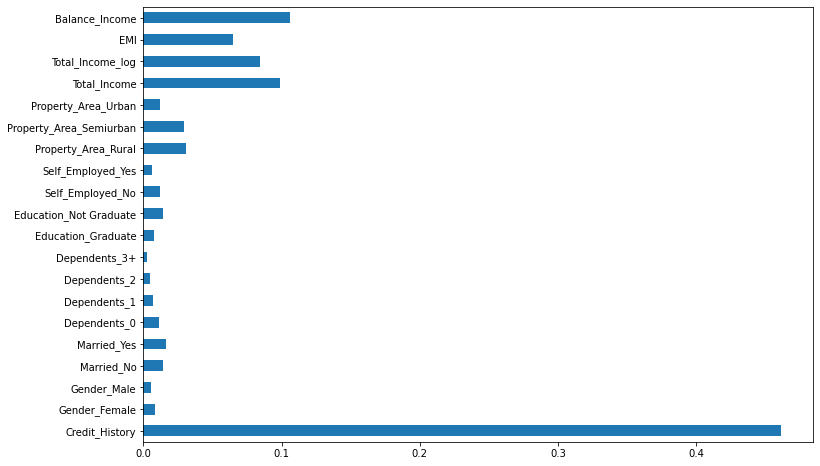

In [35]:
#calculating importance of each feature
importances = pd.Series(model.feature_importances_,index= X.columns)
importances.plot(kind='barh',figsize=(12,8))

## XGBosst Classifier

Parameters:
    
    n_estimators : this specifies the number of trees of the model
    max_depth : max depth of a tree can be specified here

In [36]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print(' {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    model = XGBClassifier(random_state=1,max_depth=4,n_estimators=50)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print("accuracy score: ",score)
    i +=1
    pred_test = model.predict(test)
    pred2 = model.predict_proba(xvl)[:,1]
    

C:\Python\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


 1 of kfold 5
accuracy score:  0.7967479674796748
 2 of kfold 5
accuracy score:  0.7723577235772358
 3 of kfold 5
accuracy score:  0.7886178861788617
 4 of kfold 5
accuracy score:  0.7642276422764228
 5 of kfold 5
accuracy score:  0.7786885245901639


In [38]:
#Reading the sample submission file
submission = pd.read_csv('results/sample_submission_49d68Cx.csv')

submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [39]:
#we need Loan Status in terms of Y and N
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission['Loan_Status'].replace(0,'N',inplace=True)

In [40]:
#Converting it to csv format
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('results/XGBclassifier.csv',index=False)